In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Load & Read the data

In [109]:
df=pd.read_excel('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\ML Datasets\\california_housing.xlsx')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


### Dataset Information

In [3]:
df.shape

(20640, 10)

In [4]:
df.size

206400

In [5]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age      int64
total_rooms             int64
total_bedrooms        float64
population              int64
households              int64
median_income         float64
ocean_proximity        object
median_house_value      int64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


### Statistical measures

In [8]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Impute missing values

In [9]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

In [110]:
df.total_bedrooms.fillna(df.total_bedrooms.mean(), inplace=True)
df.isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

### Encode Categorical Data

In [11]:
df.ocean_proximity.unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [111]:
dum=pd.get_dummies(df['ocean_proximity'])
dum

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [112]:
data=df.join(dum)
data.drop('ocean_proximity',axis=1,inplace=True)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


### Divide data into Dependent & Independent features

In [128]:
X=data.drop('median_house_value', axis=1)
y=data.median_house_value

In [130]:
X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,0,0,0,1,0


In [132]:
y.head()

0    452600
1    358500
2    352100
3    341300
4    342200
Name: median_house_value, dtype: int64

### Split Data into training & testing set

In [133]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y, train_size=0.75, random_state=5)
print("Training shape", x_train.shape[0])
print("Testing Shape", x_test.shape[0])

Training shape 15480
Testing Shape 5160


In [134]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)

In [135]:
scaler=StandardScaler()
x_test=scaler.fit_transform(x_test)

### Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression
reg=LinearRegression(fit_intercept=True,
                        normalize='deprecated',
                        copy_X=True,
                        n_jobs=None,
                        positive=False)
reg.fit(x_train,y_train)

LinearRegression()

In [137]:
#predict
y_pred=reg.predict(x_test)

In [138]:
#coefficient
reg.coef_

array([-53305.73927082, -54216.0973072 ,  12918.83540769, -12415.53373965,
        29617.2868528 , -44264.92243774,  31824.76796326,  73437.95376809,
         5830.65716814, -12439.3338483 ,   3049.60718814,   2658.98472325,
         6012.45380442])

In [139]:
#intercepts
reg.intercept_

206425.89857881144

In [140]:
reg.score(x_test, y_test)

0.6507563656351469

In [141]:
from sklearn.metrics import mean_squared_error 
print("MSE", mean_squared_error(y_test,y_pred))

MSE 4780910963.770902


In [142]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 69144.13181008857


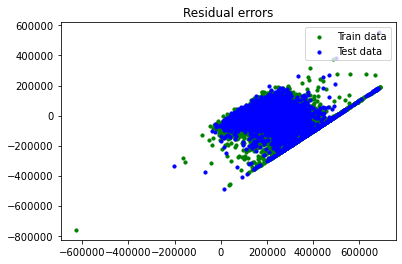

In [27]:
## plotting residual errors in training data
plt.scatter(reg.predict(x_train), reg.predict(x_train) - y_train,
            color = "green", s = 10, label = 'Train data')
  
## plotting residual errors in test data
plt.scatter(reg.predict(x_test), reg.predict(x_test) - y_test,
            color = "blue", s = 10, label = 'Test data')
  
## plotting line for zero residual error
plt.hlines(y = 0, xmin = 0, xmax = 50, linewidth = 2)
  
## plotting legend
plt.legend(loc = 'upper right')
  
## plot title
plt.title("Residual errors")
  
## method call for showing the plot
plt.show()

#### MSE is high, Lets perform Regularization L1 & L2

In [28]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=1.0,
    fit_intercept=True,
    normalize='deprecated',
    precompute=False,
    copy_X=True,
    max_iter=1000,
    tol=0.0001,
    warm_start=False,
    positive=False,
    random_state=None,
    selection='cyclic')
lasso.fit(x_train,y_train)

Lasso()

In [29]:
print("Score:", lasso.score(x_test,y_test))

Score: 0.6383721984066442


In [30]:
y_pred=lasso.predict(x_test)
print("MSE", mean_squared_error(y_test,y_pred))

MSE 4780179460.918066


In [31]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 69138.84191189542


#### MSE is same as regression model, now perform ridge regression

In [32]:
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=1.0,
    fit_intercept=True,
    normalize='deprecated',
    copy_X=True,
    max_iter=None,
    tol=0.001,
    solver='auto',
    positive=False,
    random_state=None)
ridge.fit(x_train,y_train)

Ridge()

In [33]:
print("Score:", ridge.score(x_test,y_test))

Score: 0.6383761546622853


In [34]:
y_pred=ridge.predict(x_test)
print("MSE", mean_squared_error(y_test,y_pred))

MSE 4780127165.126994


In [35]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 69138.46371685585


#### MSE is same as Regression, So perform Different Method.

### Decision Tree Regressor

In [36]:
X=data.drop('median_house_value', axis=1).values
y=data.median_house_value.values

In [37]:
x_train,x_test,y_train,y_test=train_test_split(X,y, train_size=0.75, random_state=0)
print("Training shape", x_train.shape[0])
print("Testing Shape", x_test.shape[0])

Training shape 15480
Testing Shape 5160


In [38]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor(random_state=0)

In [39]:
print("Score", dt_reg.score(x_test,y_test))

Score 0.6456156552959326


In [40]:
y_pred=dt_reg.predict(x_test)
print("MSE", mean_squared_error(y_test,y_pred))

MSE 4684431778.644573


In [41]:
print("RMSE", np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE 68442.90889964112


In [42]:
from sklearn.metrics import r2_score
r_square=r2_score(y_test,y_pred)
print("R-Sqaured Error: ", r_square)

R-Sqaured Error:  0.6456156552959326


In [48]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, explained_variance_score
print("R-Sqaured Error: ", r2_score(y_test,y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Explained Variance Score:", explained_variance_score(y_test,y_pred))

R-Sqaured Error:  0.6456156552959326
Mean Absolute Error:  43264.28410852713
Mean Squared Error:  4684431778.644573
Root Mean Squared Error:  68442.90889964112
Explained Variance Score: 0.6461952699024522


#### MSE is not decreasing.

### Random Forest Regressor

In [158]:
from sklearn.ensemble import RandomForestRegressor
rf_reg=RandomForestRegressor(n_estimators=40, random_state=30)
rf_reg.fit(x_train,y_train)

RandomForestRegressor(n_estimators=40, random_state=30)

In [159]:
y_pred=rf_reg.predict(x_test)
print("R-Sqaured Error: ", r2_score(y_test,y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Explained Variance Score:", explained_variance_score(y_test,y_pred))

R-Sqaured Error:  0.8104385325132757
Mean Absolute Error:  33787.32843507752
Mean Squared Error:  2594969267.983848
Root Mean Squared Error:  50940.84086451506
Explained Variance Score: 0.8105606752370937


#### MSE  is reduced and R- Squared value approaching towards 1.

### XGBoost

In [174]:
from sklearn.datasets import load_boston
boston=load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [175]:
x,y=boston.data, boston.target
x

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [176]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [177]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0


In [178]:
X=data.drop('median_house_value',axis=1).values
y=data.median_house_value.values

In [182]:
print(X)

[[-122.23   37.88   41.   ...    0.      1.      0.  ]
 [-122.22   37.86   21.   ...    0.      1.      0.  ]
 [-122.24   37.85   52.   ...    0.      1.      0.  ]
 ...
 [-121.22   39.43   17.   ...    0.      0.      0.  ]
 [-121.32   39.43   18.   ...    0.      0.      0.  ]
 [-121.24   39.37   16.   ...    0.      0.      0.  ]]


In [183]:
print(y)

[452600 358500 352100 ...  92300  84700  89400]


In [184]:
x_train,x_test,y_train,y_test=train_test_split(X,y, train_size=0.75, random_state=0)
print("Training shape", x_train.shape[0])
print("Testing Shape", x_test.shape[0])

Training shape 15480
Testing Shape 5160


In [189]:
from xgboost import XGBRegressor
xgbr=XGBRegressor(verbosity=0)
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [190]:
y_pred=xgbr.predict(x_test)
print("R-Sqaured Error: ", r2_score(y_test,y_pred))
print("Mean Absolute Error: ", mean_absolute_error(y_test,y_pred))
print("Mean Squared Error: ", mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test,y_pred)))
print("Explained Variance Score:", explained_variance_score(y_test,y_pred))

R-Sqaured Error:  0.8301951825354061
Mean Absolute Error:  31412.574156673934
Mean Squared Error:  2244566090.418935
Root Mean Squared Error:  47376.851841579075
Explained Variance Score: 0.8302841759893168


#### MSE is litle lower than Random Forest and R-Squared score is also better than in case of Random Forest.

Now we can Apply cross validation to get better results

In [194]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(xgbr, x_train,y_train, cv=10)
print("Score:",np.mean(cv_score))

Score: 0.8266049975217911


**Plot actual & predicted values**

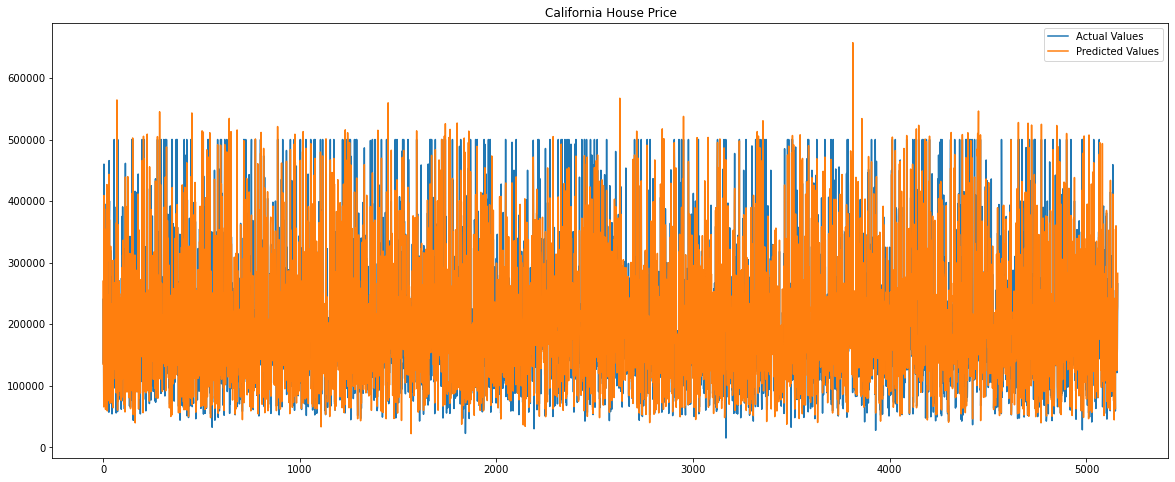

In [196]:
x_axis=range(len(y_test))
plt.figure(figsize=(20,8))
plt.plot(x_axis,y_test, label="Actual Values")
plt.plot(x_axis,y_pred, label="Predicted Values")
plt.title("California House Price")
plt.legend();